<p style="text-align:center">
    <a href="https://skills.network/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkST0151ENSkillsNetwork20531532-2022-01-01" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>



#### Import the required libraries we need for the lab.


In [39]:
import piplite
await piplite.install(['numpy'],['pandas'])
await piplite.install(['seaborn'])

In [40]:
import pandas as pd
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as pyplot
import scipy.stats
import statsmodels.api as sm
from statsmodels.formula.api import ols

#### Read the dataset in the csv file from the URL


In [41]:
from js import fetch
import io

URL = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ST0151EN-SkillsNetwork/labs/boston_housing.csv'
resp = await fetch(URL)
boston_url = io.BytesIO((await resp.arrayBuffer()).to_py())

In [42]:
boston_df=pd.read_csv(boston_url)

#### Add your code below following the instructions given in the course to complete the peer graded assignment


In [43]:
boston_df.head()

,Unnamed: 0,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
0,0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,4.98,24.0
1,1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,9.14,21.6
2,2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,4.03,34.7
3,3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,2.94,33.4
4,4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,5.33,36.2


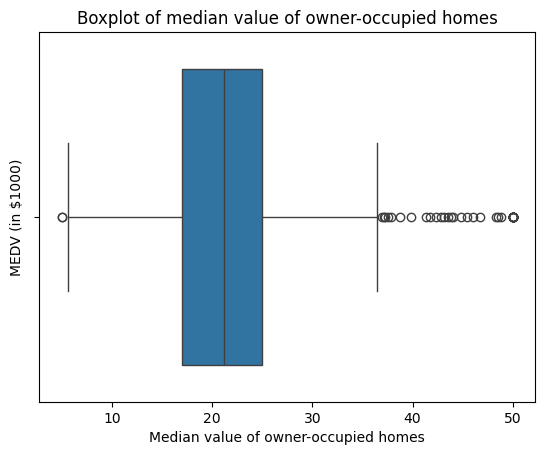

In [44]:
# For the "Median value of owner-occupied homes" provide a boxplot
f = sns.boxplot(x = 'MEDV', data=boston_df)
f.set(xlabel ="Median value of owner-occupied homes", ylabel = "MEDV (in $1000)", title ='Boxplot of median value of owner-occupied homes')
pyplot.show()

# Conclusion: The median value of owner-occupied homes is right-skewed with a median value (of MEDV) of around 20000 USD.

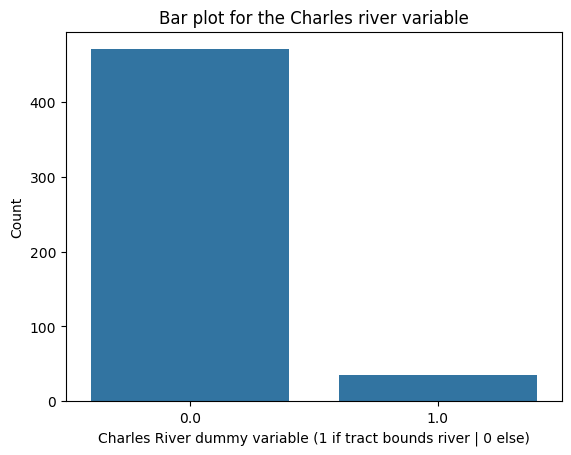

0.0691699604743083
0.9308300395256917


In [45]:
# Provide a  bar plot for the Charles river variable
f = sns.countplot(x='CHAS', data=boston_df)
f.set(xlabel ="Charles River dummy variable (1 if tract bounds river | 0 else)", ylabel = "Count", title ='Bar plot for the Charles river variable')
pyplot.show()

print(len(boston_df.loc[boston_df['CHAS'] == 1])/len(boston_df))
print(len(boston_df.loc[boston_df['CHAS'] == 0])/len(boston_df))
# Conclusion: the number of tracts that bound the Charles river is much smaller (7%) than the number that don't bound the Charles river (93%).

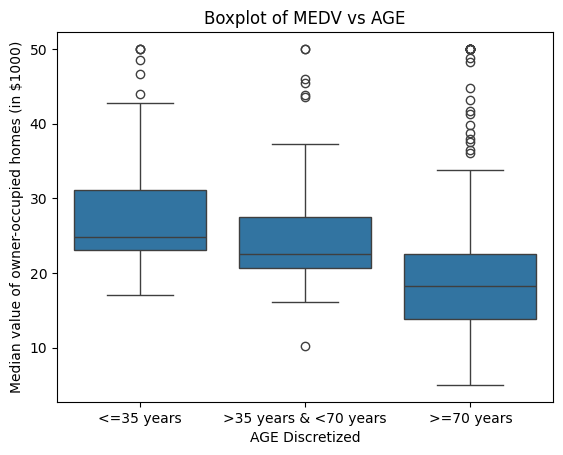

In [46]:
# Provide a boxplot for the MEDV variable vs the AGE variable. (Discretize the age variable into three groups of 35 years and younger, between 35 and 70 years and 70 years and older)

boston_df['age_d']=pd.cut(x=boston_df['AGE'], bins=[0,35,70,float('inf')], labels=["<=35 years",">35 years & <70 years",">=70 years"])
f = sns.boxplot(x='age_d', y='MEDV', data=boston_df)
f.set(xlabel ="AGE Discretized", ylabel = "Median value of owner-occupied homes (in $1000)", title ='Boxplot of MEDV vs AGE')
pyplot.show()

# Conclusion: The MEDV variable seems to decrease when AGE increases. This is expected as older homes tend to be cheaper than newer ones.

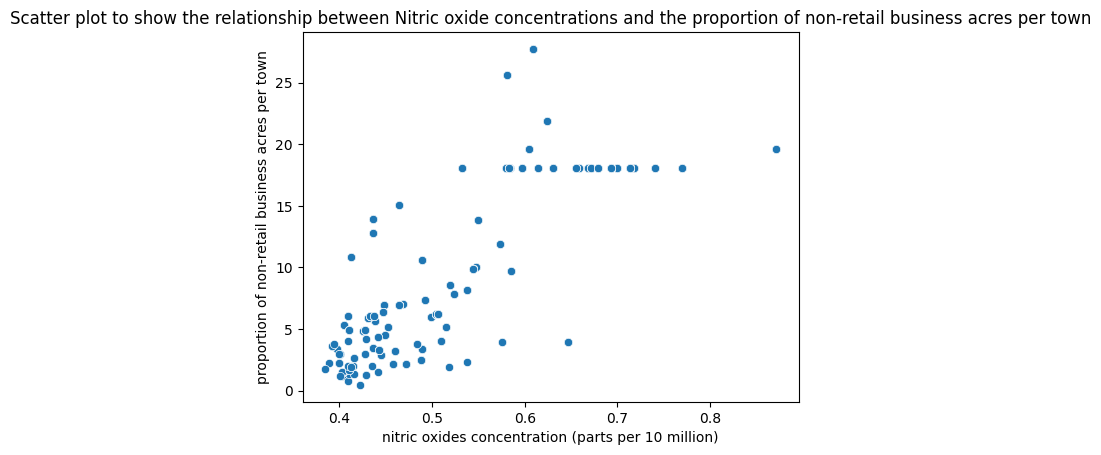

In [47]:
# Provide a scatter plot to show the relationship between Nitric oxide concentrations and the proportion of non-retail business acres per town. 
f = sns.scatterplot(x='NOX', y='INDUS', data=boston_df)
f.set(xlabel ="nitric oxides concentration (parts per 10 million)", ylabel = "proportion of non-retail business acres per town", title ='Scatter plot to show the relationship between Nitric oxide concentrations and the proportion of non-retail business acres per town')
pyplot.show()

# Conclusion: there seems to be a positive correlation between the proportion of non-retail business acres and the nitric oxides concentration. 
# This is not surprising as the presence of pollutants is expected to increase with increased industrial activity.

<ipython-input-48-e222a75739aa>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  f = sns.distplot(boston_df['PTRATIO'], kde = False)


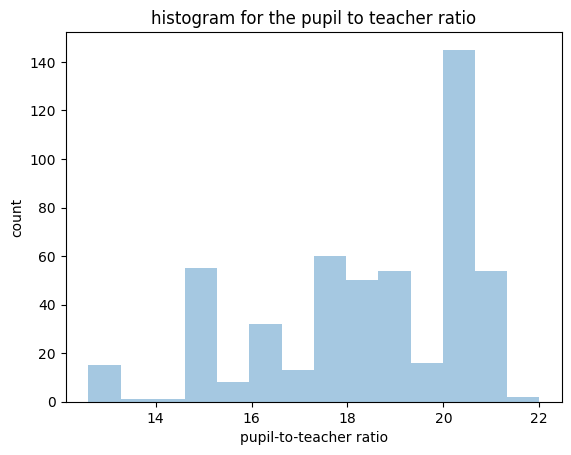

12.6
22.0


In [48]:
# Create a histogram for the pupil to teacher ratio variable
f = sns.distplot(boston_df['PTRATIO'], kde = False)
f.set(xlabel ="pupil-to-teacher ratio", ylabel = "count", title ='histogram for the pupil to teacher ratio')
pyplot.show()

print(boston_df['PTRATIO'].min())
print(boston_df['PTRATIO'].max())

# Conclusion: The pupil-to-teacher ratio ranges between 12.6 and 22.0. The distribution seems left-skewed. This is not expected as a lower pupil-to-teacher
# might indicate a more affluate region where the schools have higher budgets. Therefore, we expect most pupil-to-teacher ratios to be on the higher end. 

In [49]:
# Is there a significant difference in median value of houses bounded by the Charles river or not? (T-test for independent samples)

y = boston_df.loc[boston_df['CHAS'] == 1]['MEDV']
n = boston_df.loc[boston_df['CHAS'] == 0]['MEDV']

# H0: sd(MEDV for CHAS = 1) = sd(MEDV for CHAS = 0)
# H1: sd(MEDV for CHAS = 1) / sd(MEDV for CHAS = 0)
print(scipy.stats.levene(y,n))

# H0: mean(MEDV for CHAS = 1) = mean(MEDV for CHAS = 0)
# H1: mean(MEDV for CHAS = 1) / mean(MEDV for CHAS = 0)
print(scipy.stats.ttest_ind(y,n, equal_var = False))

# Conclusion: First, we test for equal variances. As p = 0.03 < alpha = 0.05, we reject H0 and therefore perform the T-test for unequal variances.
# For the T-test we have p = 0.004 < 0.05, therefore we again reject H0 at significance level 0.05 that the means are equal.

LeveneResult(statistic=4.590342218715871, pvalue=0.03263097600633006)
TtestResult(statistic=3.113291312794837, pvalue=0.003567170098137517, df=36.876408797611994)


In [53]:
# Is there a difference in Median values of houses (MEDV) for each proportion of owner occupied units built prior to 1940 (AGE)? (ANOVA)

# H0: mean(MEDV for AGE group 1) = mean(MEDV for AGE group 2) = mean(MEDV for AGE = age_3), where the groups have been defined in the descriptive statistics above
# H1: there exists at least one pair (i,j) for 1 <= i,j <= 3 and i /= j where  mean(MEDV for AGE group i) /= mean(MEDV for AGE = group j)

lowest = boston_df[boston_df['age_d'] == '<=35 years']['MEDV']
middle = boston_df[boston_df['age_d'] == '>35 years & <70 years']['MEDV']
highest = boston_df[boston_df['age_d'] == '>=70 years']['MEDV']

print(scipy.stats.f_oneway(lowest, middle, highest))

# Conclusion: As p = 1.7e-15 < alpha = 0.05. Therefore, we reject H0 at significance level 0.05 implying that at least one group has a different mean.


F_onewayResult(statistic=36.40764999196599, pvalue=1.7105011022702984e-15)


In [51]:
# Can we conclude that there is no relationship between Nitric oxide concentrations and proportion of non-retail business acres per town? (Pearson Correlation)

# H0: Cor(NOX,INDUS) = 0
# H1: Cor(NOX,INDUS) /= 0

scipy.stats.pearsonr(x = boston_df['NOX'], y = boston_df['INDUS'])

# Conclusion: p = 8e-98 < alpha = 0.05. Therefore, at significance level 0.05 we reject H0 that there is no correlation between NOX and INDUS.

PearsonRResult(statistic=0.7636514469209192, pvalue=7.913361061210442e-98)

In [52]:
# What is the impact of an additional weighted distance to the five Boston employment centres on the median value of owner occupied homes? (Regression analysis)

## covariate
X = boston_df['DIS']
## dependent variable
y = boston_df['MEDV']
## add an intercept
X = sm.add_constant(X) 

model = sm.OLS(y, X).fit()
# Print out the statistics
model.summary()

# Conclusion: The regression after applying OLS is MEDV = 18.4 + 1.09*DIS. Both coefficients 18.4 and 1.09 are statistically significant from 0 as for both:
# p = 0.000 < alpha = 0.05.
# Therefore, we can conclude that the effect of an increase of 1 in the weighted distance to the five boston employment centres results on average 
#in an increase of 1.09 (in 1000 USD) for the median home value.

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   MEDV   R-squared:                       0.062
Model:                            OLS   Adj. R-squared:                  0.061
Method:                 Least Squares   F-statistic:                     33.58
Date:                Tue, 13 Aug 2024   Prob (F-statistic):           1.21e-08
Time:                        16:15:54   Log-Likelihood:                -1823.9
No. Observations:                 506   AIC:                             3652.
Df Residuals:                     504   BIC:                             3660.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         18.3901      0.817     22.499      0.000      16.784      19.996
DIS            1.0916      0.188      5.795      0.000       0.722       1.462
==============================================================================
Omnibus:                      139.779   Durbin-Watson:                   0.570
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              305.104
Skew:                           1.466   Prob(JB):                     5.59e-67
Kurtosis:                       5.424   Cond. No.                         9.32
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""